In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
# Import and read the healthcare-dataset-stroke-data.csv.
import pandas as pd 
stroke_df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA & Preprocessiong

In [3]:
# dataframe information
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# checking for NaNs in each column
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# create a series of avg BMI for each age
avg_bmi_by_age = stroke_df.groupby("age")["bmi"].mean()
avg_bmi_by_age

age
0.08     15.500000
0.16     14.766667
0.24     17.400000
0.32     18.080000
0.40     15.850000
           ...    
78.00    27.929032
79.00    27.862338
80.00    28.783582
81.00    27.951667
82.00    28.029091
Name: bmi, Length: 104, dtype: float64

In [7]:
# replace NaNs in BMI column with "avg_bmi_by_age" for the corresponding age
def replace_bmi(row):
    if pd.isna(row["bmi"]):
        return avg_bmi_by_age[row["age"]]
    else:
        return row["bmi"]
    
stroke_df["bmi"] = stroke_df.apply(replace_bmi, axis = 1)

In [8]:
# checking for NaNs for BMI column
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
# Drop the Id column as Id column has no impact on data analysis
stroke_df = stroke_df.drop(columns = ["id"])
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.19,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [10]:
# checking unique value in each column
stroke_df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   487
smoking_status          4
stroke                  2
dtype: int64

In [11]:
# gender value counts
stroke_df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
# drop "other from stroke_df["gender"] column since it's just 1 record
stroke_df = stroke_df.drop(stroke_df[stroke_df["gender"] == "Other"].index)

In [13]:
# check is the "other" is droped
stroke_df["gender"].unique()

array(['Male', 'Female'], dtype=object)

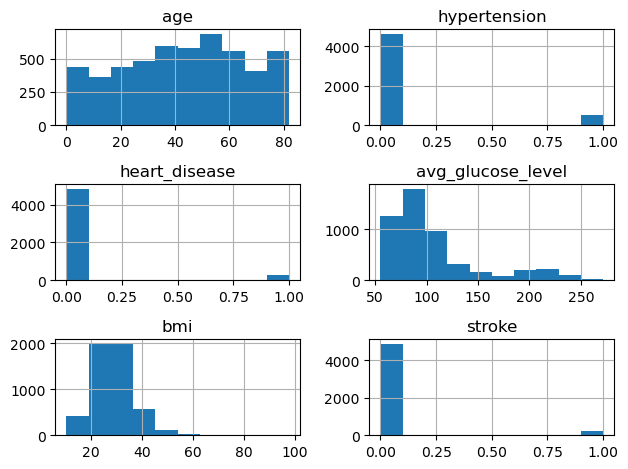

In [14]:
# to check how the data is destributed
stroke_df.hist()
plt.tight_layout()

In [16]:
# Look at the stroke outcome value counts
stroke_counts = stroke_df["stroke"].value_counts()
stroke_counts

0    4860
1     249
Name: stroke, dtype: int64

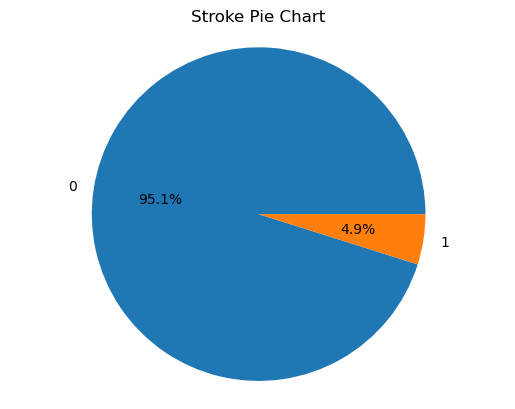

In [18]:
# Count the occurrences of each unique value in the "stroke" column
stroke_counts = stroke_df["stroke"].value_counts()

# Get the labels and values for the pie chart
labels = stroke_counts.index
values = stroke_counts.values

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

# Add a title
plt.title("Stroke Pie Chart")

# Display the chart
plt.show()

**Findings :** As we can see from the Histogram and the pie chart that the Target Variable of our dataset is imbalanced. 

### Separate the Features (X) from the Target (y)

In [20]:
y = stroke_df["stroke"]
X = stroke_df.drop(columns = "stroke")
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.19,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked


In [26]:
# Convert categorical data to numeric with `pd.get_dummies` 
X_encoded = pd.get_dummies(X)
X_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.60,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,30.19,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.50,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.40,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.00,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0


### Handle imbalanced dataset using SMOTE

In [23]:
# import SMOTE = Synthetic Minority Oversampling Technique
# After "over_sampling" the minority class will balance the data as majority class
# the Minority class will be synthetically created 

from imblearn.over_sampling import SMOTE

In [24]:
# Perform oversampling with SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_encoded, y)


In [35]:
from collections import Counter

print(f" Before SMOTE :", Counter(y))
print(f" After SMOTE :", Counter(y_smote))

 Before SMOTE : Counter({0: 4860, 1: 249})
 After SMOTE : Counter({1: 4860, 0: 4860})


# ---------------------------------------------------------------------------------------- 

### Scale the data using scaler

In [39]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_smote)
X_smote_scaled = X_scaler.transform(X_smote)
X_smote_scaled

array([[ 0.53910552, -0.30716139,  4.31698548, ...,  2.59711762,
        -0.60032648, -0.32778026],
       [ 0.26823058, -0.30716139, -0.23164312, ..., -0.38504225,
         1.66576027, -0.32778026],
       [ 1.12600123, -0.30716139,  4.31698548, ..., -0.38504225,
         1.66576027, -0.32778026],
       ...,
       [ 0.95117303,  3.25561751, -0.23164312, ..., -0.38504225,
        -0.60032648, -0.32778026],
       [ 0.41099556, -0.30716139, -0.23164312, ...,  2.59711762,
        -0.60032648, -0.32778026],
       [ 0.17711638, -0.30716139, -0.23164312, ..., -0.38504225,
        -0.60032648, -0.32778026]])

### Split the data into train and test dataset

In [40]:
# Split the processed data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_smote_scaled, y_smote, test_size = 0.2, random_state=1)